In [1]:
using DynamicalSystems, CairoMakie, Random, LinearAlgebra

In [2]:
function slicematrix(A::AbstractMatrix{T}) where T
    m, n = size(A)
    B = Vector{T}[Vector{T}(undef, n) for _ in 1:m]
    for i in 1:m
        B[i] .= A[i, :]
    end
    return B
end

slicematrix (generic function with 1 method)

In [3]:
Γ(x, λ, Θ) = 1 / (1 + exp(-λ*(x - Θ)))
dΓ(x, λ, Θ) = (λ*exp(-λ*(x - Θ))) / ((1 + exp(-λ*(x - Θ)))^2)

dΓ (generic function with 1 method)

In [4]:
# 2 coupled HR neurons
# Equations of motion:
@inline @inbounds function loop(u, p, t)
    a = p[1]; b = p[2]; c = p[3]; d = p[4]; xr = p[5]; r = p[6]; s = p[7]; I = p[8]; vs = p[9]; λ = p[10]; Θ = p[11]; 
    k1 = p[12]; k2 = p[13]; k = p[14] 
    du1 = u[2]+b*u[1]^2-a*u[1]^3-u[3]+I-k1*(u[1]-vs)*Γ(u[4], λ, Θ)+k*(u[4]-u[1])
    du2 = c-d*u[1]^2-u[2]
    du3 = r*(s*(u[1]-xr)-u[3])
    du4 = u[5]+b*u[4]^2-a*u[4]^3-u[6]+I-k2*(u[4]-vs)Γ(u[1], λ, Θ)+k*(u[1]-u[4])
    du5 = c-d*u[4]^2-u[5]
    du6 = r*(s*(u[4]-xr)-u[6])
    return SVector{6}(du1, du2, du3, du4, du5, du6)
end

# Jacobian:
@inline @inbounds function loop_jac(u, p, t)
    a, b, c, d, xr, r, s, I, vs, λ, Θ, k1, k2, k = p
    J = @SMatrix [2*b*u[1]-3*a*u[1]^2-k1*Γ(u[4], λ, Θ)-k 1 (-1) (-k1)*(u[1]-vs)*dΓ(u[4], λ, Θ)+k 0 0;
    (-2)*d*u[1] (-1) 0 0 0 0;
    r*s 0 (-r) 0 0 0;
    (-k2)*(u[4]-vs)*dΓ(u[1], λ, Θ)+k 0 0 2*b*u[4]-3*a*u[4]^2-k2*Γ(u[1], λ, Θ)-k 1 (-1);
    0 0 0 (-2)*d*u[4] (-1) 0;
    0 0 0 r*s 0 (-r)]
    return J
end

hr = ContinuousDynamicalSystem(loop, [-1.5, 0.0, 0.0, -1.5, 0.0, 0.0], [1.0, 3.0, 1.0, 5.0, -1.6, 0.01, 5.0, 4.0, 2.0, 10.0, 
        -0.25, -0.17, -0.17, 0.0], loop_jac)

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [1.0, 3.0, 1.0, 5.0, -1.6, 0.01, …, -0.25, -0.17, -0.17, 0.0]

┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbi

┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbitdiagrams\poincare.jl:113
┌ Warning: The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\semenjuta.e\.julia\packages\ChaosTools\Xe6aI\src\orbi

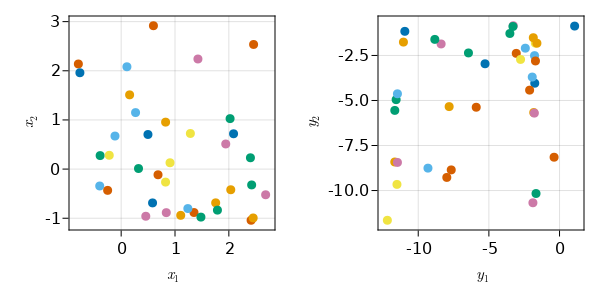

In [19]:
plane = (3, 0.0)


fig = Figure(resolution = (600,300))
axx = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2")
axy = Axis(fig[1,2]; xlabel = L"y_1", ylabel = L"y_2")
for i in 1:100
    rng = MersenneTwister(i);
    u0 = randn!(rng, zeros(6))
    psos = poincaresos(hr, plane, 20000.0; u0 = u0)
    scatter!(axx, psos[:, 1], psos[:, 4]; marketsize = 2.0)
    scatter!(axy, psos[:, 2], psos[:, 5]; marketsize = 2.0)
end

fig
# save("z_1 = 0.png", fig)